# **Plot BPV in low data regimes**


### Imports

In [2]:
import numpy as np # arrays, array operations
import scipy.stats as stats # statistics
import matplotlib.pyplot as plt # plot graphs
import pandas as pd #dataframes
import io
import xarray as xr #multidimensional dataframes
import pymc as pm
import arviz as az
import scipy.interpolate as interpolate
import preliz

### Data

In [3]:

data = pd.read_csv('..\data\muscle_force.csv')
for col in data.columns: # see names of the columns in a loop
    print(col)

Force
Length


<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\User\AppData\Local\Temp\ipykernel_27300\58695320.py:1: SyntaxWarning: invalid escape sequence '\d'
  data = pd.read_csv('..\data\muscle_force.csv')


Plot

Text(0, 0.5, 'Force [N]')

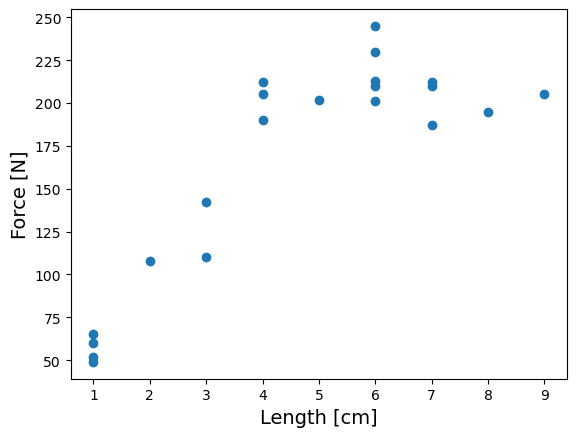

In [6]:
plt.scatter(data.Length, data.Force)

plt.xlabel('Length [cm]', fontsize = 14)
plt.ylabel('Force [N]', fontsize = 14)


### Simple Linear Regression

Model

In [7]:
coords = {"data": np.arange(len(data))}
with pm.Model(coords=coords) as model_slr:
    b0 = pm.Normal("b0", mu=50, sigma=50)
    b1 = pm.Normal("b1", mu=0, sigma=50)
    sig = pm.HalfNormal("sig", 10)
    mu = pm.Deterministic("mu", b0 + b1 * data.Length, dims="data")
    y_pred = pm.Normal("y_pred", mu=mu, sigma=sig, observed=data.Force, dims="data")

    idata_slr = pm.sample(1000, chains = 4)

idata_slr

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b0, b1, sig]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 42 seconds.


Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

Posterior Data

array([<Axes: title={'center': 'b0'}>, <Axes: title={'center': 'b1'}>,
       <Axes: title={'center': 'sig'}>], dtype=object)

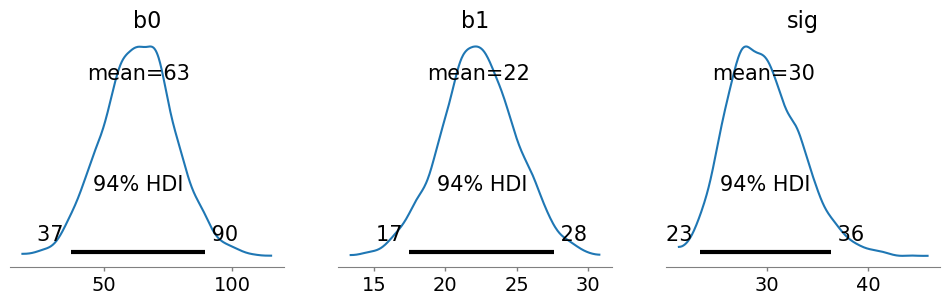

In [8]:
az.plot_posterior(idata_slr, var_names=["~mu"], figsize=(12, 3))

<Axes: xlabel='b0', ylabel='b1'>

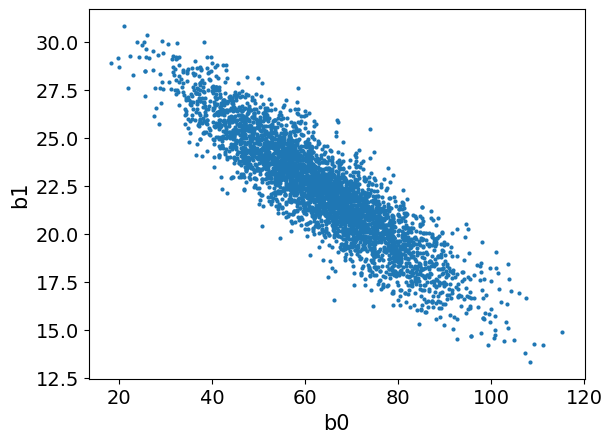

In [9]:
#pair plot
az.plot_pair(idata_slr, var_names=['b0', 'b1'])

Posterior Predictive

In [10]:
pm.sample_posterior_predictive(idata_slr, model=model_slr, extend_inferencedata=True)


Sampling: [y_pred]


Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

Bayesian p-value

<Axes: title={'center': 'y_pred'}>

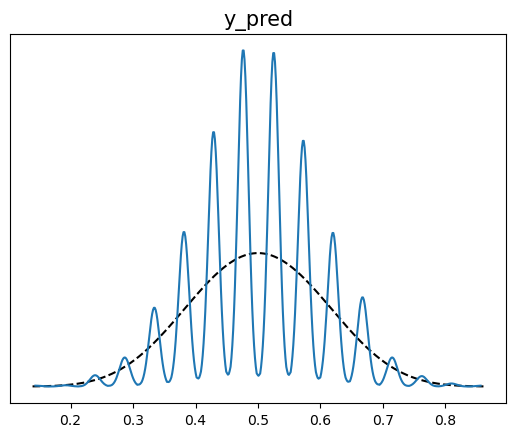

In [12]:
#distribution
az.plot_bpv(idata_slr, kind="p_value")


### Resample the data


In [23]:
data_resampled = data.sample(n=100, replace=True)
data_resampled

,Force,Length
18,212,7
9,212,4
18,212,7
6,142,3
4,108,2
...,...,...
10,202,5
0,49,1
11,201,6
9,212,4


In [24]:
coords = {"data": np.arange(len(data_resampled))}
with pm.Model(coords=coords) as model_resampled:
    b0 = pm.Normal("b0", mu=50, sigma=50)
    b1 = pm.Normal("b1", mu=0, sigma=50)
    sig = pm.HalfNormal("sig", 10)
    mu = pm.Deterministic("mu", b0 + b1 * data_resampled.Length, dims="data")
    y_pred = pm.Normal("y_pred", mu=mu, sigma=sig, observed=data_resampled.Force, dims="data")

    idata_resampled = pm.sample(1000, chains = 4)

idata_resampled

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b0, b1, sig]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 36 seconds.


Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

In [25]:
pm.sample_posterior_predictive(idata_resampled, model=model_resampled, extend_inferencedata=True)

Sampling: [y_pred]


Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

<Axes: title={'center': 'y_pred'}>

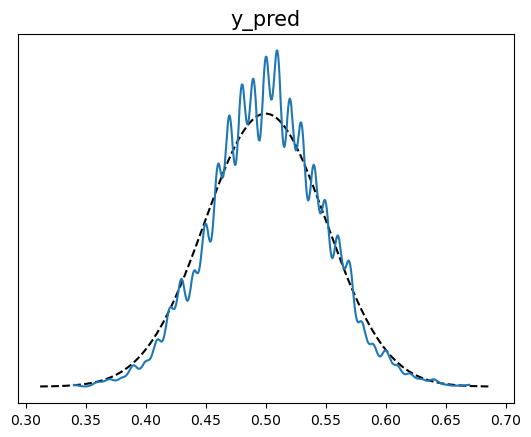

In [26]:
az.plot_bpv(idata_resampled, kind="p_value")